In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df_house = pd.read_csv('house.csv')
df_house_copy = df_house.drop("Unnamed: 0", axis=1)
df_house_copy

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df_house_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
df_house_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df_house_copy.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [6]:
df_house_copy['CHAS'].value_counts(normalize=False)

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
df_house_copy['RAD'].value_counts(normalize=False)

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [8]:
df_house_copy['ZN'].value_counts(normalize=False)

ZN
0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: count, dtype: int64

In [9]:
df_house_copy['AGE'].value_counts(normalize=False)

AGE
100.0    43
95.4      4
96.0      4
98.2      4
97.9      4
         ..
58.4      1
74.4      1
73.4      1
33.1      1
89.3      1
Name: count, Length: 356, dtype: int64

In [10]:
corr = df_house_copy.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

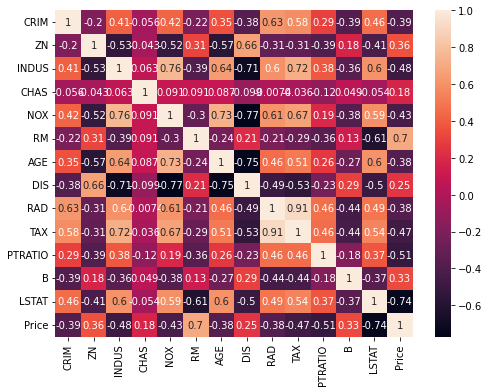

In [11]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr, annot = True)

c:\Users\David\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\David\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\David\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\David\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

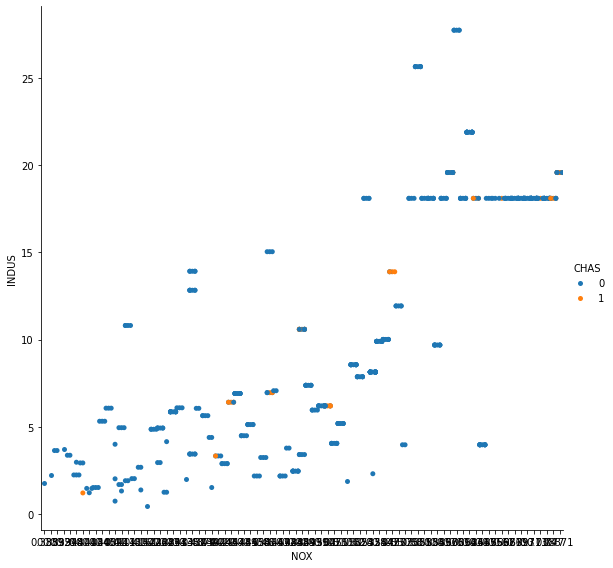

In [12]:
sns.catplot(x="NOX", y="INDUS", hue="CHAS",kind="swarm", data=df_house_copy, height=8, aspect=1)

C:\Users\David\AppData\Local\Temp\ipykernel_25240\3324522978.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_house_copy['Price'])


<Axes: xlabel='Price', ylabel='Density'>

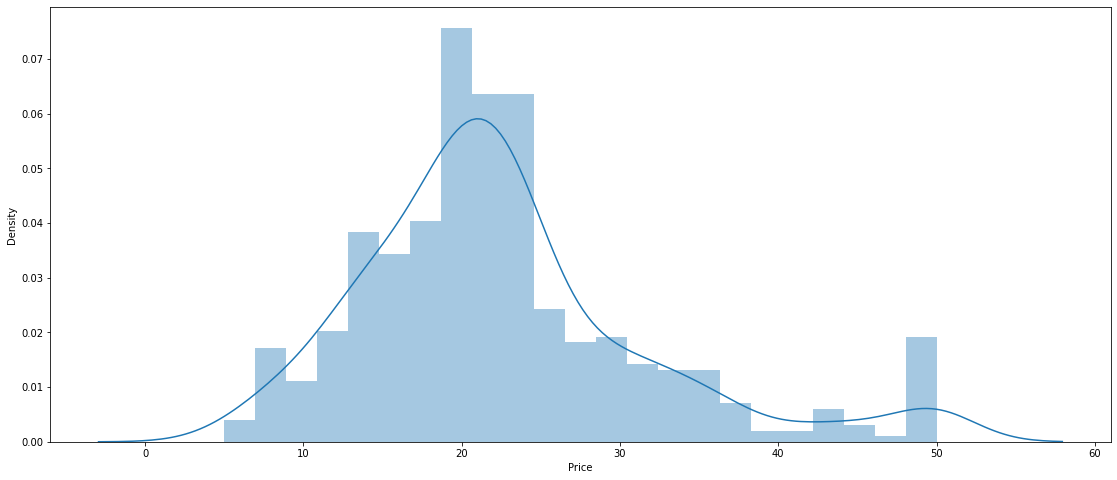

In [13]:
plt.figure(figsize=(19,8))
sns.distplot(df_house_copy['Price'])

In [28]:
price_medio= df_house_copy[(df_house_copy['Price'] >= 18) & (df_house_copy['Price'] <= 22)].reset_index()
price_medio = price_medio.drop("index", axis=1)
price_medio

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
2,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
3,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
4,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
132,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
133,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
134,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6


In [30]:
price_alto= df_house_copy[(df_house_copy['Price'] >= 45)].reset_index()
price_alto = price_alto.drop("index", axis=1)
price_alto

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
1,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
2,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
3,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
4,0.05602,0.0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50.0
5,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
6,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
7,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
8,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
9,0.29819,0.0,6.20,0,0.5040,7.686,17.0,3.3751,8,307,17.4,377.51,3.92,46.7


In [31]:
corr_medio = price_medio.corr()
corr_medio

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.178978,0.449283,-0.015691,0.451948,0.023929,0.205973,-0.304215,0.799493,0.715789,0.233022,-0.148537,0.194183,0.025145
ZN,-0.178978,1.000000,-0.450914,-0.068237,-0.479948,-0.016448,-0.502807,0.758856,-0.226258,-0.177545,-0.194647,0.058386,-0.271120,0.009995
INDUS,0.449283,-0.450914,1.000000,0.025604,0.701855,0.052354,0.549068,-0.674656,0.477437,0.527313,0.179722,-0.148816,0.372835,0.014219
CHAS,-0.015691,-0.068237,0.025604,1.000000,0.059268,0.140401,0.209056,-0.109344,0.055280,-0.026467,-0.065028,0.050406,0.312391,0.207188
NOX,0.451948,-0.479948,0.701855,0.059268,1.000000,0.049332,0.624066,-0.712126,0.531879,0.556440,0.146580,-0.232711,0.275924,-0.067383
RM,0.023929,-0.016448,0.052354,0.140401,0.049332,1.000000,0.128428,-0.081012,0.087498,0.108153,0.091190,0.028105,-0.333353,0.234510
AGE,0.205973,-0.502807,0.549068,0.209056,0.624066,0.128428,1.000000,-0.726888,0.204759,0.256311,0.156627,-0.125238,0.547237,-0.249790
DIS,-0.304215,0.758856,-0.674656,-0.109344,-0.712126,-0.081012,-0.726888,1.000000,-0.316487,-0.379715,-0.218046,0.150454,-0.399693,0.003085
RAD,0.799493,-0.226258,0.477437,0.055280,0.531879,0.087498,0.204759,-0.316487,1.000000,0.884509,0.304844,-0.204157,0.176504,0.045227
TAX,0.715789,-0.177545,0.527313,-0.026467,0.556440,0.108153,0.256311,-0.379715,0.884509,1.000000,0.288331,-0.218511,0.177559,-0.040274


<Axes: >

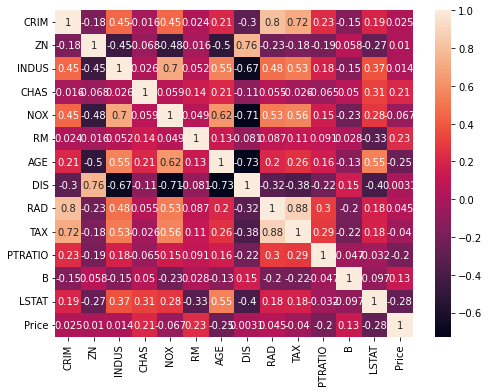

In [32]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr_medio, annot = True)

In [33]:
corr_alto = price_alto.corr()
corr_alto

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.424055,0.717130,0.336213,0.657291,-0.791678,0.602563,-0.700041,0.929909,0.943183,0.783005,-0.644827,0.507198,0.351217
ZN,-0.424055,1.000000,-0.618812,-0.105416,-0.710405,0.250923,-0.713733,0.781859,-0.435935,-0.515998,-0.473494,0.515486,-0.207678,0.002251
INDUS,0.717130,-0.618812,1.000000,0.378430,0.747398,-0.550439,0.774762,-0.783805,0.612685,0.835731,0.504472,-0.543559,0.026032,0.392758
CHAS,0.336213,-0.105416,0.378430,1.000000,0.170798,-0.207731,0.181382,-0.119578,0.274241,0.348560,0.199067,-0.083114,-0.145282,0.083247
NOX,0.657291,-0.710405,0.747398,0.170798,1.000000,-0.377701,0.874660,-0.964082,0.586940,0.723188,0.348800,-0.504458,0.377190,0.425964
RM,-0.791678,0.250923,-0.550439,-0.207731,-0.377701,1.000000,-0.319231,0.423553,-0.833101,-0.800140,-0.761511,0.584419,-0.236228,-0.135020
AGE,0.602563,-0.713733,0.774762,0.181382,0.874660,-0.319231,1.000000,-0.869451,0.532834,0.682608,0.341160,-0.414079,0.223266,0.391216
DIS,-0.700041,0.781859,-0.783805,-0.119578,-0.964082,0.423553,-0.869451,1.000000,-0.651667,-0.771290,-0.496302,0.516818,-0.376813,-0.448471
RAD,0.929909,-0.435935,0.612685,0.274241,0.586940,-0.833101,0.532834,-0.651667,1.000000,0.939045,0.885432,-0.582850,0.394707,0.229426
TAX,0.943183,-0.515998,0.835731,0.348560,0.723188,-0.800140,0.682608,-0.771290,0.939045,1.000000,0.795623,-0.605747,0.285102,0.382681


<Axes: >

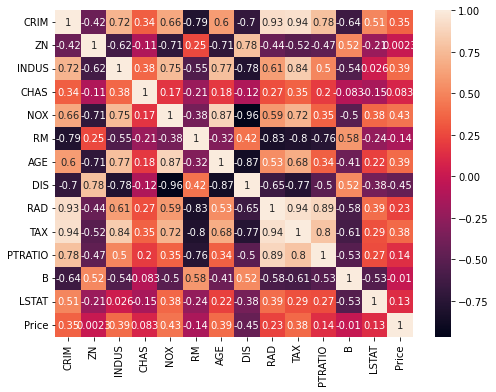

In [34]:
plt.subplots(figsize=(8,6))
sns.heatmap(corr_alto, annot = True)

In [35]:
X = df_house_copy.drop(columns=['Price'])
y = df_house_copy['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modello1 = LinearRegression()
modello1.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = modello1.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))

MSE: 24.291119474973538
R²: 0.6687594935356317
